<a href="https://colab.research.google.com/github/Czar210/PUC-CDIA/blob/3-semestre/Rooney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import pandas as pd
import numpy as np
!pip install ortools
from ortools.linear_solver import pywraplp
Comus='/content/cosmus.xlsx'
data = pd.read_csv('/content/tabela_necessidades_dieteticas.csv')


In [164]:
data

,Sexo,Peso (kg),Proteínas (g/dia),Carboidratos (g/dia),Gorduras (g/dia),Vitamina A (mcg/dia),Vitamina C (mg/dia),Cálcio (mg/dia),Ferro (mg/dia)
0,Homem,50,40,200,50,900,90,1000,8
1,Homem,60,48,240,60,900,90,1000,8
2,Homem,70,56,280,70,900,90,1000,8
3,Homem,80,64,320,80,900,90,1000,8
4,Homem,90,72,360,90,900,90,1000,8
5,Homem,100,80,400,100,900,90,1000,8
6,Mulher,50,40,200,50,700,75,1000,18
7,Mulher,55,43,215,55,700,75,1000,18
8,Mulher,60,46,230,60,700,75,1000,18
9,Mulher,65,49,245,65,700,75,1000,18


In [ ]:
Mulher = data[data['Sexo'] == 'Mulher']
x = Mulher['Peso (kg)']
x = np.array(x).reshape(-1,1) # colocar numpy e como coluna
x

array([[50],
       [55],
       [60],
       [65],
       [70]])

In [ ]:
y = Mulher['Proteínas (g/dia)']
y = np.array(y).reshape(-1,1) # colocar numpy e como coluna
y

array([[40],
       [43],
       [46],
       [49],
       [52]])

In [ ]:
valor = 64
input = np.array([[valor]])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x,y)

LinearRegression()

In [ ]:
model.predict(input)

array([[48.4]])

In [ ]:
# Passar uma amostragem de pontos para o preditor criado
xx = np.linspace(40,70, 100)
yhat = model.predict(xx.reshape(-1,1))

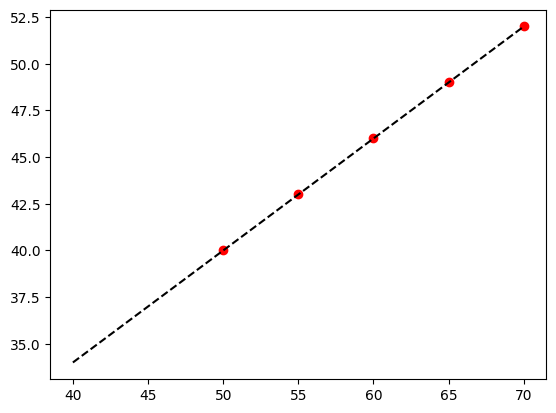

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,y, 'ro')
plt.plot(xx,yhat,'k--')

In [168]:
from sklearn.linear_model import LinearRegression

# Definir as variáveis de entrada e as variáveis-alvo
input_features = ["Peso (kg)"]
target_features = ["Proteínas (g/dia)", "Carboidratos (g/dia)", "Gorduras (g/dia)", "Vitamina A (mcg/dia)", "Vitamina C (mg/dia)", "Cálcio (mg/dia)", "Ferro (mg/dia)"]

# Entrada: Sexo e peso


sexo = str(input('Coloque seu sexo: '))
peso = str(input('Coloque seu peso: '))

# Filtrar dados por sexo
filtered_data = data[data['Sexo'] == sexo]

# Treinar o modelo de regressão linear para cada variável-alvo
models = {}
for target in target_features:
    model = LinearRegression()
    model.fit(filtered_data[input_features], filtered_data[target], sample_weight=None)
    models[target] = model

# Prever os valores intermediários para o peso dado
predictions = {}
for target, model in models.items():
    prediction = model.predict(pd.DataFrame(data=[[peso]], columns=input_features))
    predictions[target] = prediction[0]
lista = []
# Imprimir os resultados
print(f"Valores interpolados para {sexo} com {peso} kg:")
for target, value in predictions.items():
    print(f"{target}: {value:.2f}")
    lista.append(value)




Valores interpolados para Homem com 50 kg:
Proteínas (g/dia): 40.00
Carboidratos (g/dia): 200.00
Gorduras (g/dia): 50.00
Vitamina A (mcg/dia): 900.00
Vitamina C (mg/dia): 90.00
Cálcio (mg/dia): 1000.00
Ferro (mg/dia): 8.00


In [ ]:

df = pd.read_excel('/content/za.xlsx')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.fillna(0, inplace=True)

df

,ID,Descrição,Energia,Proteína,Lipídeos,Carb,Cálcio,Ferro,A,C,Café
0,1,"Arroz, integral, cozido",123.534893,2.58825,1.000333,25.80975,5.204,0.262,0,0,1
1,2,"Arroz, integral, cru",359.678002,7.323286,1.864833,77.450714,7.818,0.948333,0,0,1
2,3,"Arroz, tipo 1, cozido",128.258486,2.520817,0.227,28.05985,3.544333,0.076667,0,0,1
3,4,"Arroz, tipo 1, cru",357.789273,7.15854,0.335,78.759543,4.414333,0.677747,0,0,1
4,5,"Arroz, tipo 2, cozido",130.119648,2.568417,0.361667,28.192583,3.333667,0.050333,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
569,570,"Gergelim, semente",583.546715,21.164667,50.432667,21.617666,825.446333,5.447667,0,Tr,0
570,571,"Linhaça, semente",495.096114,14.083867,32.252933,43.312199,211.497667,4.697,0,Tr,0
571,572,"Pinhão, cozido",174.369902,2.980367,0.747,43.917633,15.767333,0.755333,0,27.69,1
572,573,"Pupunha, cozida",218.533881,2.522917,12.761667,29.569417,27.586333,0.518667,0,2.18,0


In [ ]:
proc = lista[0]/5
carc = lista[1]/5
gorc = lista[2]/5
vac = lista[3]/5
vcc = lista [4]/5
calc = lista[5]/5
ferc = lista[6]/5
cafc = 0

proa = lista[0]*3/5
cara = lista[1]*3/5
gora = lista[2]*3/5
vaa = lista[3]*3/5
vca = lista [4]*3/5
cala = lista[5]*3/5
fera = lista[6]*3/5
cafa = 1

print(proa)

36.0


In [ ]:
alimentos_df = pd.read_excel('/content/za.xlsx')
alimentos_df

,id,d,p,g,va,vc,cal,c,f,caf
0,1,"Arroz, integral, cozido",2.6,1.0,0,0.0,5,25.8,0.3,1
1,2,"Arroz, integral, cru",7.3,1.9,0,0.0,8,77.5,0.9,1
2,3,"Arroz, tipo 1, cozido",2.5,0.2,0,0.0,4,28.1,0.1,1
3,4,"Arroz, tipo 1, cru",7.2,0.3,0,0.0,4,78.8,0.7,1
4,5,"Arroz, tipo 2, cozido",2.6,0.4,0,0.0,3,28.2,0.1,1
...,...,...,...,...,...,...,...,...,...,...
592,593,"Gergelim, semente",21.2,50.4,0,0.0,825,21.6,5.4,0
593,594,"Linhaça, semente",14.1,32.3,0,0.0,211,43.3,4.7,0
594,595,"Pinhão, cozido",3.0,0.7,0,27.7,16,43.9,0.8,1
595,596,"Pupunha, cozida",2.5,12.8,438,2.2,28,29.6,0.5,1


In [ ]:
from ortools.linear_solver import pywraplp
import pandas as pd

# Carregar os dados dos alimentos do arquivo Excel
alimentos_df = pd.read_excel('/content/za.xlsx')



# Definir o solver
solver = pywraplp.Solver.CreateSolver('GLOP')

# Variáveis de decisão para a quantidade de cada alimento
quantidades_alimentos = [solver.IntVar(0, solver.infinity(), alimentos_df.iloc[i]['d']) for i in range(len(alimentos_df))]

# Restrições para garantir que os requisitos nutricionais sejam atendidos
solver.Add(sum(alimentos_df.iloc[i]['c'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= carc)
solver.Add(sum(alimentos_df.iloc[i]['p'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= proc)
solver.Add(sum(alimentos_df.iloc[i]['g'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= gorc)
solver.Add(sum(alimentos_df.iloc[i]['va'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= vac)
solver.Add(sum(alimentos_df.iloc[i]['vc'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= vcc)
solver.Add(sum(alimentos_df.iloc[i]['cal'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= calc)
solver.Add(sum(alimentos_df.iloc[i]['f'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= ferc)
solver.Add(sum(alimentos_df.iloc[i]['caf'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) <= cafc)




# Função objetivo para minimizar o número total de alimentos
objective = solver.Objective()
for var in quantidades_alimentos:
    objective.SetCoefficient(var, 1)
objective.SetMinimization()

# Resolver o problema
status = solver.Solve()

# Verificar se a solução foi encontrada
if status == pywraplp.Solver.OPTIMAL:
    print('Dieta otimizada encontrada:')
    for i in range(len(alimentos_df)):
        if quantidades_alimentos[i].solution_value() > 0:
            print(f"{alimentos_df.iloc[i]['d']}: {quantidades_alimentos[i].solution_value()} unidades")
else:
    print('Não foi possível encontrar uma solução ótima para a dieta.')

Dieta otimizada encontrada:
Cereais, mingau, milho, infantil: 0.029812543859828778 unidades
Leite, de vaca, integral, pó: 0.12111178938809358 unidades
Achocolatado, pó: 0.17041781483648466 unidades
Gelatina, sabores variados, pó: 0.36846269254336833 unidades
Amendoim, torrado, salgado: 0.1388263151205066 unidades
Gergelim, semente: 0.07614600908862788 unidades


In [152]:


# Definir o solver
solver = pywraplp.Solver.CreateSolver('GLOP')

# Variáveis de decisão para a quantidade de cada alimento
quantidades_alimentos = [solver.IntVar(0, solver.infinity(), alimentos_df.iloc[i]['d']) for i in range(len(alimentos_df))]

# Restrições para garantir que os requisitos nutricionais sejam atendidos
solver.Add(sum(alimentos_df.iloc[i]['c'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= carc)
solver.Add(sum(alimentos_df.iloc[i]['p'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= proc)
solver.Add(sum(alimentos_df.iloc[i]['g'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= gorc)
solver.Add(sum(alimentos_df.iloc[i]['va'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= vac)
solver.Add(sum(alimentos_df.iloc[i]['vc'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= vcc)
solver.Add(sum(alimentos_df.iloc[i]['cal'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= calc)
solver.Add(sum(alimentos_df.iloc[i]['f'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= ferc)
solver.Add(sum(alimentos_df.iloc[i]['caf'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= cafc)




# Função objetivo para minimizar o número total de alimentos
objective = solver.Objective()
for var in quantidades_alimentos:
    objective.SetCoefficient(var, 1)
objective.SetMinimization()

# Resolver o problema
status = solver.Solve()

# Excluir os alimentos usados na dieta otimizada
alimentos_usados = []
for i in range(len(alimentos_df)):
    if quantidades_alimentos[i].solution_value() > 0:
        alimentos_usados.append(alimentos_df.iloc[i]['d'])

# Filtrar o DataFrame de alimentos para excluir os alimentos usados
alimentos_df_filtrado = alimentos_df[~alimentos_df['d'].isin(alimentos_usados)]
alimentos_df_filtrado = alimentos_df_filtrado[alimentos_df_filtrado['caf'] != 0]

# Atualizar o solver com o novo DataFrame de alimentos
solver = pywraplp.Solver.CreateSolver('GLOP')

# Variáveis de decisão para a quantidade de cada alimento
quantidades_alimentos = [solver.IntVar(0, solver.infinity(), alimentos_df_filtrado.iloc[i]['d']) for i in range(len(alimentos_df_filtrado))]

# Restrições para garantir que os requisitos nutricionais sejam atendidos
solver.Add(sum(alimentos_df_filtrado.iloc[i]['c'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= cara)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['p'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= proa)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['g'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= gora)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['va'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= vaa)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['vc'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= vca)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['cal'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= cala)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['f'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= fera)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['caf'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= cafc)

# Função objetivo para minimizar o número total de alimentos
objective = solver.Objective()
for var in quantidades_alimentos:
    objective.SetCoefficient(var, 1)
objective.SetMinimization()

# Resolver o problema
status = solver.Solve()

# Verificar se a solução foi encontrada
if status == pywraplp.Solver.OPTIMAL:
    print('Nova dieta otimizada encontrada:')
    for i in range(len(alimentos_df_filtrado)):
        if quantidades_alimentos[i].solution_value() > 0:
            print(f"{alimentos_df_filtrado.iloc[i]['d']}: {quantidades_alimentos[i].solution_value()} unidades")
else:
    print('Não foi possível encontrar uma solução ótima para a nova dieta.')





Nova dieta otimizada encontrada:
Creme de milho, pó: 0.9077954972703294 unidades
Pipoca, com óleo de soja, sem sal: 0.7448501550557519 unidades
Carne, bovina, fígado, cru: 0.034020034020034014 unidades
Chocolate, ao leite: 0.5687158517571331 unidades
Soja, extrato solúvel, pó: 0.5453668414897596 unidades


In [155]:

# Definir o solver
solver = pywraplp.Solver.CreateSolver('GLOP')

# Variáveis de decisão para a quantidade de cada alimento
quantidades_alimentos = [solver.IntVar(0, solver.infinity(), alimentos_df.iloc[i]['d']) for i in range(len(alimentos_df))]

# Restrições para garantir que os requisitos nutricionais sejam atendidos
solver.Add(sum(alimentos_df.iloc[i]['c'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= carc)
solver.Add(sum(alimentos_df.iloc[i]['p'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= proc)
solver.Add(sum(alimentos_df.iloc[i]['g'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= gorc)
solver.Add(sum(alimentos_df.iloc[i]['va'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= vac)
solver.Add(sum(alimentos_df.iloc[i]['vc'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= vcc)
solver.Add(sum(alimentos_df.iloc[i]['cal'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= calc)
solver.Add(sum(alimentos_df.iloc[i]['f'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= ferc)
solver.Add(sum(alimentos_df.iloc[i]['caf'] * quantidades_alimentos[i] for i in range(len(alimentos_df))) >= cafc)




# Função objetivo para minimizar o número total de alimentos
objective = solver.Objective()
for var in quantidades_alimentos:
    objective.SetCoefficient(var, 1)
objective.SetMinimization()

# Resolver o problema
status = solver.Solve()

# Excluir os alimentos usados na dieta otimizada
alimentos_usados = []
for i in range(len(alimentos_df)):
    if quantidades_alimentos[i].solution_value() > 0:
        alimentos_usados.append(alimentos_df.iloc[i]['d'])

# Filtrar o DataFrame de alimentos para excluir os alimentos usados
alimentos_df_filtrado = alimentos_df[~alimentos_df['d'].isin(alimentos_usados)]
alimentos_df_filtrado = alimentos_df_filtrado[alimentos_df_filtrado['caf'] != 0]

# Atualizar o solver com o novo DataFrame de alimentos
solver = pywraplp.Solver.CreateSolver('GLOP')

# Variáveis de decisão para a quantidade de cada alimento
quantidades_alimentos = [solver.IntVar(0, solver.infinity(), alimentos_df_filtrado.iloc[i]['d']) for i in range(len(alimentos_df_filtrado))]

# Restrições para garantir que os requisitos nutricionais sejam atendidos
solver.Add(sum(alimentos_df_filtrado.iloc[i]['c'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= cara)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['p'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= proa)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['g'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= gora)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['va'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= vaa)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['vc'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= vca)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['cal'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= cala)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['f'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= fera)
solver.Add(sum(alimentos_df_filtrado.iloc[i]['caf'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado))) >= cafc)

# Função objetivo para minimizar o número total de alimentos
objective = solver.Objective()
for var in quantidades_alimentos:
    objective.SetCoefficient(var, 1)
objective.SetMinimization()

# Resolver o problema
status = solver.Solve()

# Excluir os alimentos usados na dieta otimizada
alimentos_usados2 = []
for i in range(len(alimentos_df_filtrado)):
    if quantidades_alimentos[i].solution_value() > 0:
        alimentos_usados2.append(alimentos_df_filtrado.iloc[i]['d'])

# Filtrar o DataFrame de alimentos para excluir os alimentos usados
alimentos_df_filtrado2 = alimentos_df_filtrado[~alimentos_df_filtrado['d'].isin(alimentos_usados2)]

# Atualizar o solver com o novo DataFrame de alimentos
solver = pywraplp.Solver.CreateSolver('GLOP')

# Variáveis de decisão para a quantidade de cada alimento
quantidades_alimentos = [solver.IntVar(0, solver.infinity(), alimentos_df_filtrado2.iloc[i]['d']) for i in range(len(alimentos_df_filtrado2))]

# Restrições para garantir que os requisitos nutricionais sejam atendidos
solver.Add(sum(alimentos_df_filtrado2.iloc[i]['c'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado2))) >= carc)
solver.Add(sum(alimentos_df_filtrado2.iloc[i]['p'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado2))) >= proc)
solver.Add(sum(alimentos_df_filtrado2.iloc[i]['g'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado2))) >= gorc)
solver.Add(sum(alimentos_df_filtrado2.iloc[i]['va'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado2))) >= vac)
solver.Add(sum(alimentos_df_filtrado2.iloc[i]['vc'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado2))) >= vcc)
solver.Add(sum(alimentos_df_filtrado2.iloc[i]['cal'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado2))) >= calc)
solver.Add(sum(alimentos_df_filtrado2.iloc[i]['f'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado2))) >= ferc)
solver.Add(sum(alimentos_df_filtrado2.iloc[i]['caf'] * quantidades_alimentos[i] for i in range(len(alimentos_df_filtrado2))) >= cafc)

# Função objetivo para minimizar o número total de alimentos
objective = solver.Objective()
for var in quantidades_alimentos:
    objective.SetCoefficient(var, 1)
objective.SetMinimization()

# Resolver o problema
status = solver.Solve()

# Verificar se a solução foi encontrada
if status == pywraplp.Solver.OPTIMAL:
    print('Nova dieta otimizada encontrada:')
    for i in range(len(alimentos_df_filtrado2)):
        if quantidades_alimentos[i].solution_value() > 0:
            print(f"{alimentos_df_filtrado2.iloc[i]['d']}: {quantidades_alimentos[i].solution_value()} unidades")
else:
    print('Não foi possível encontrar uma solução ótima para a nova dieta.')




Nova dieta otimizada encontrada:
Farinha, de arroz, enriquecida: 0.06295395752240357 unidades
Coentro, folhas desidratadas: 0.16548608784980776 unidades
Frango, fígado, cru: 0.023150283154596222 unidades
Chocolate, ao leite, dietético: 0.15968029491929223 unidades
Cocada branca: 0.37731209203521554 unidades
Soja, farinha: 0.18153384165158712 unidades
